<a href="https://colab.research.google.com/github/ai-saturdays-guayaquil/Curso/blob/master/DL_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *

In [0]:
folder = 'leones'
file = 'leones/leones.txt'

In [0]:
folder = 'tigres'
file = 'tigres/tigres.txt'

In [0]:
folder = 'pumas'
file = 'pumas/pumas.txt'

In [0]:
folder = 'jaguares'
file = 'jaguares/jaguares.txt'

In [0]:
folder = 'guepardos'
file = 'guepardos/guepardos.txt'

In [0]:
folder = 'panteras'
file = 'panteras/panteras.txt'

In [0]:
path = Path('data/felinos')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [21]:
download_images(path/file, dest, max_pics=500)

Error https://www.lunadominante.com/wp-content/uploads/15109851022_4179cbe345_z-compressor.jpg ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))
Error https://www.zooportraits.com/wp-content/uploads/2018/05/Black-Panther-Panthera-Pardus.jpg ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))
Error https://www.animales.website/wp-content/uploads/2016/11/Pantera-negra.jpg HTTPSConnectionPool(host='www.animales.website', port=443): Read timed out. (read timeout=4)
Error https://www.ecured.cu/images/thumb/9/9e/Panteranegra.jpeg/260px-Panteranegra.jpeg HTTPSConnectionPool(host='www.ecured.cu', port=443): Max retries exceeded with url: /images/thumb/9/9e/Panteranegra.jpeg/260px-Panteranegra.jpeg (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x7f8fd79b7940>, 'Connection to www.ecured.cu timed out. (connect timeout=4)'))
Error http://tumamifero.com/wp-content/uploads/201

In [0]:
classes = ['leones','tigres','pumas','jaguares','guepardos','panteras']

In [23]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

leones


cannot identify image file <_io.BufferedReader name='data/felinos/leones/00000358.jpg'>
cannot identify image file <_io.BufferedReader name='data/felinos/leones/00000357.jpg'>
cannot identify image file <_io.BufferedReader name='data/felinos/leones/00000454.jpg'>
cannot identify image file <_io.BufferedReader name='data/felinos/leones/00000238.jpg'>
cannot identify image file <_io.BufferedReader name='data/felinos/leones/00000371.jpg'>
cannot identify image file <_io.BufferedReader name='data/felinos/leones/00000410.jpg'>
cannot identify image file <_io.BufferedReader name='data/felinos/leones/00000176.jpg'>
cannot identify image file <_io.BufferedReader name='data/felinos/leones/00000393.jpg'>
cannot identify image file <_io.BufferedReader name='data/felinos/leones/00000476.jpg'>
cannot identify image file <_io.BufferedReader name='data/felinos/leones/00000048.jpg'>
cannot identify image file <_io.BufferedReader name='data/felinos/leones/00000032.jpg'>
cannot identify image file <_io.

cannot identify image file <_io.BufferedReader name='data/felinos/tigres/00000358.jpg'>
cannot identify image file <_io.BufferedReader name='data/felinos/tigres/00000263.jpg'>
cannot identify image file <_io.BufferedReader name='data/felinos/tigres/00000353.jpg'>
cannot identify image file <_io.BufferedReader name='data/felinos/tigres/00000337.jpg'>
cannot identify image file <_io.BufferedReader name='data/felinos/tigres/00000217.jpg'>
cannot identify image file <_io.BufferedReader name='data/felinos/tigres/00000319.jpg'>
cannot identify image file <_io.BufferedReader name='data/felinos/tigres/00000152.jpg'>
cannot identify image file <_io.BufferedReader name='data/felinos/tigres/00000381.jpg'>
pumas


cannot identify image file <_io.BufferedReader name='data/felinos/pumas/00000088.jpg'>
jaguares


cannot identify image file <_io.BufferedReader name='data/felinos/jaguares/00000048.jpg'>
cannot identify image file <_io.BufferedReader name='data/felinos/jaguares/00000078.jpg'>
cannot identify image file <_io.BufferedReader name='data/felinos/jaguares/00000041.jpg'>
guepardos


cannot identify image file <_io.BufferedReader name='data/felinos/guepardos/00000067.jpg'>
panteras


cannot identify image file <_io.BufferedReader name='data/felinos/panteras/00000034.png'>
cannot identify image file <_io.BufferedReader name='data/felinos/panteras/00000012.jpg'>
cannot identify image file <_io.BufferedReader name='data/felinos/panteras/00000046.jpg'>
cannot identify image file <_io.BufferedReader name='data/felinos/panteras/00000087.jpg'>


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [25]:
data.classes

['guepardos', 'jaguares', 'leones', 'panteras', 'pumas', 'tigres']

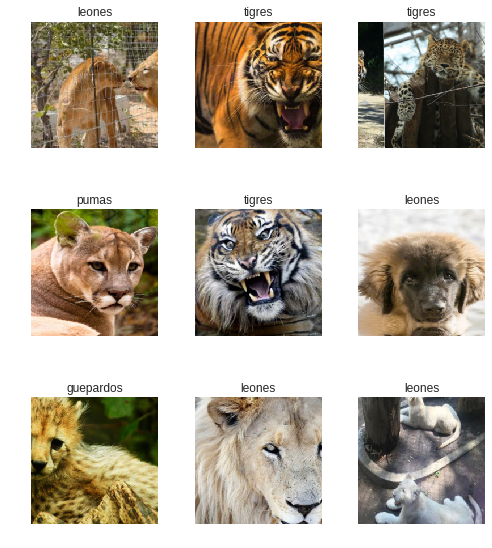

In [26]:
data.show_batch(rows=3, figsize=(7,8))

In [27]:
len(data.train_ds), len(data.valid_ds)

(964, 241)

In [28]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 95963623.95it/s]


In [29]:


learn.lr_find()



LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


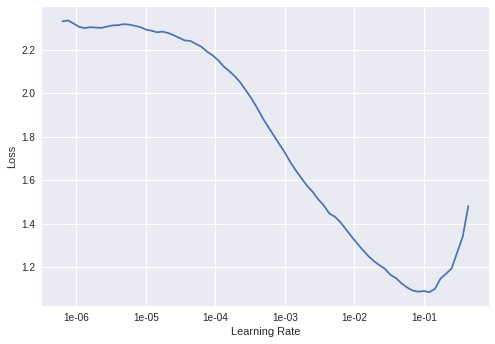

In [30]:
learn.recorder.plot()

In [31]:
learn.fit_one_cycle(5, max_lr=slice(1e-2,1e-1))

epoch,train_loss,valid_loss,error_rate,time
1,0.730273,1.220783,0.199170,00:28
2,0.912982,3.672374,0.402490,00:24
3,1.293081,2.273277,0.352697,00:23
4,1.125827,0.570950,0.124481,00:23
5,0.930005,0.441936,0.112033,00:23


In [0]:
learn.save('stage-1')

In [34]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (964 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
jaguares,jaguares,jaguares,jaguares,jaguares
Path: data/felinos;

Valid: LabelList (241 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
pumas,leones,tigres,pumas,leones
Path: data/felinos;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runni

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

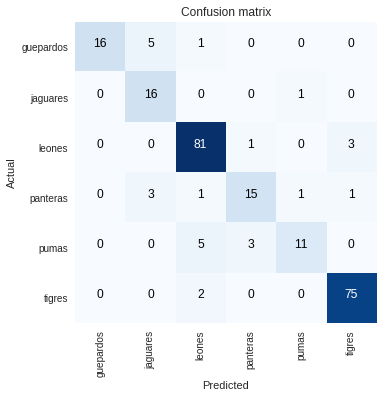

In [36]:
interp.plot_confusion_matrix()

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')
from fastai.widgets import *

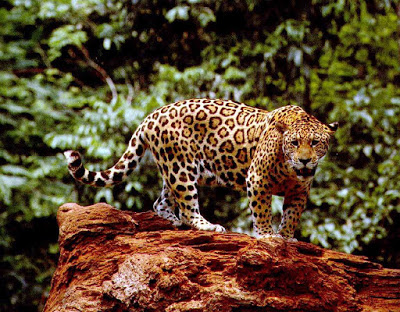

In [56]:
img1 = open_image(path/'jaguar.jpg')
img1

In [0]:
learn = load_learner(path)

In [70]:
pred_class,pred_idx,outputs = learn.predict(img1)
print(pred_class)


jaguares


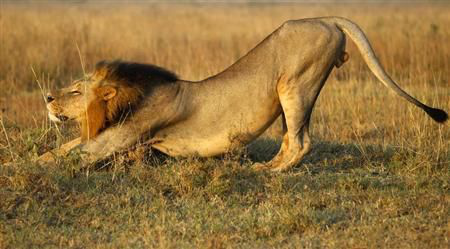

In [59]:
img2 = open_image(path/'leon.jpg')
img2

In [0]:
learn = load_learner(path)

In [71]:
pred_class,pred_idx,outputs = learn.predict(img2)
print(pred_class)


leones


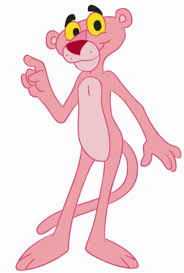

In [62]:
img3 = open_image(path/'panterarosa.jpg')
img3

In [0]:
learn = load_learner(path)

In [72]:
pred_class,pred_idx,outputs = learn.predict(img3)
print(pred_class)

leones


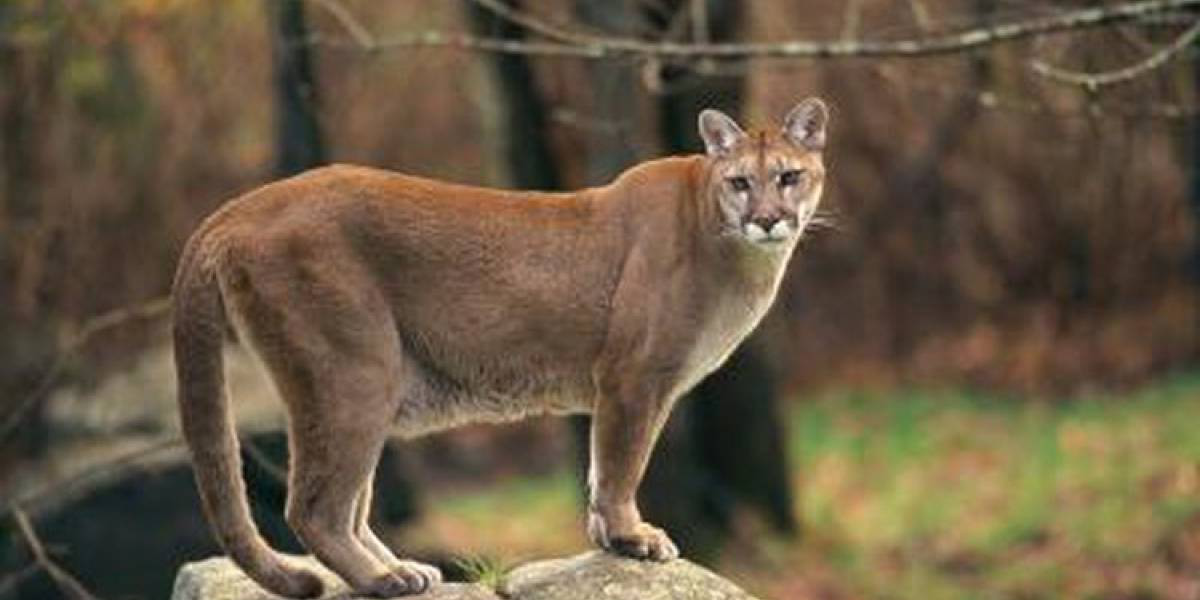

In [66]:
img4 = open_image(path/'puma.jpg')
img4

In [0]:
learn = load_learner(path)

In [73]:
pred_class,pred_idx,outputs = learn.predict(img4)
print(pred_class)

pumas
